In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import streamlit as st

In [2]:
dataset=pd.read_csv("insurance.csv")
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## In Data Analysis What All Things We Do
1. Missing Values
2. Explore About the Numerical Variables
3. Explore About categorical Variables
4. Finding Relationship between features

In [3]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010



1. Looking at the age column, data looks representative of the true age distribution of the adult population
2. Very few people have more than 2 children. 75% of the people have 2 or less children¶
3. The claimed amount is higly skewed as most people would require basic medi-care and only few suffer from diseases which cost more to get rid of

In [4]:
dataset['smoker'].unique()


array(['yes', 'no'], dtype=object)

In [5]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# corr = dataset.corr()
# sns.heatmap(corr, cmap = 'Wistia', annot= True)

In [7]:
# dataset.corr()['charges'].sort_values()

In [8]:
# sns.heatmap(dataset.corr())

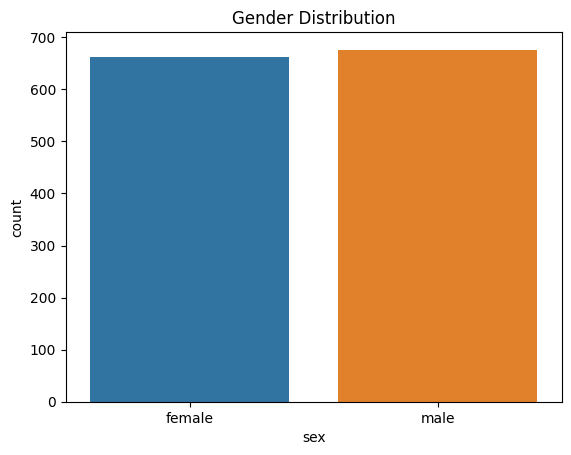

In [9]:
sns.countplot(x='sex', data=dataset)
plt.title('Gender Distribution')
plt.show()

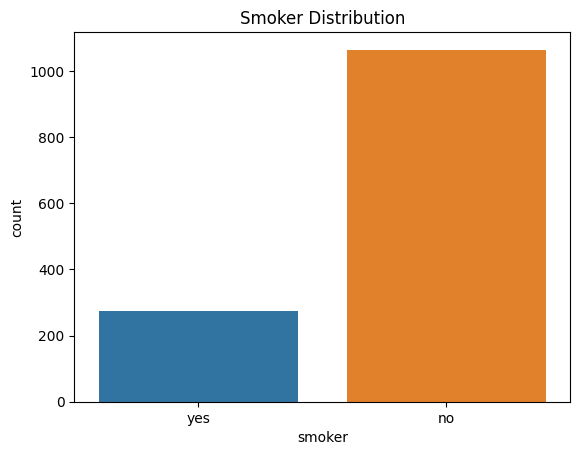

In [10]:
sns.countplot(x='smoker', data=dataset)
plt.title('Smoker Distribution')
plt.show()

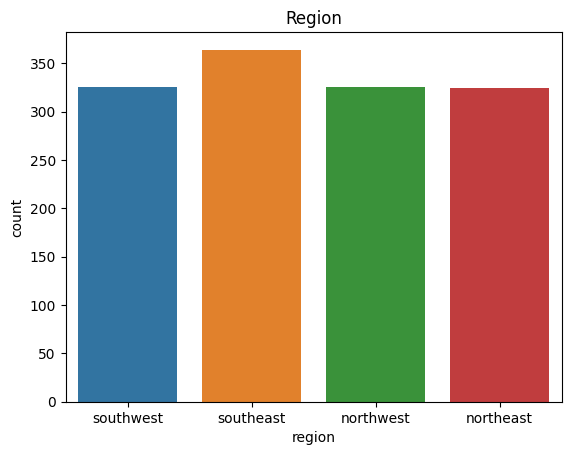

In [11]:
sns.countplot(x='region', data=dataset)
plt.title('Region')
plt.show()

/var/folders/jq/mrhtzg1d1ql51pnd3xymhk3c0000gn/T/ipykernel_51658/1946434337.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["age"], color = 'g', kde=True)


<AxesSubplot: title={'center': 'Distribution of age'}, xlabel='age', ylabel='Density'>

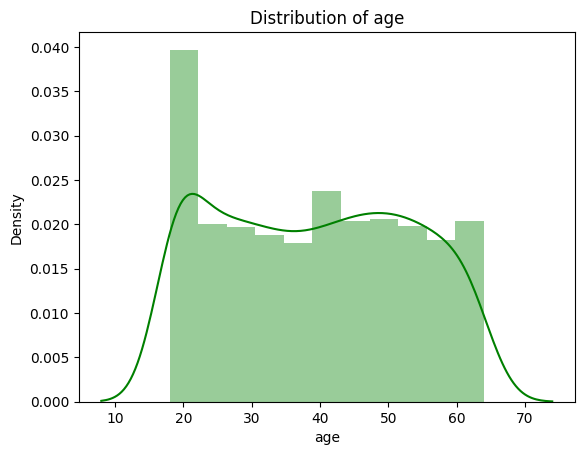

In [12]:
plt.title("Distribution of age")
sns.distplot(dataset["age"], color = 'g', kde=True)

/var/folders/jq/mrhtzg1d1ql51pnd3xymhk3c0000gn/T/ipykernel_51658/3261675404.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["bmi"], color = 'b', kde=True)


<AxesSubplot: title={'center': 'Distribution of bmi'}, xlabel='bmi', ylabel='Density'>

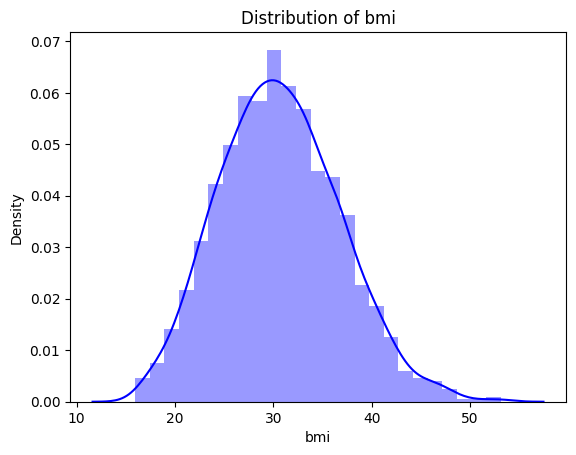

In [13]:
plt.title("Distribution of bmi")
sns.distplot(dataset["bmi"], color = 'b', kde=True)

<AxesSubplot: xlabel='charges', ylabel='Count'>

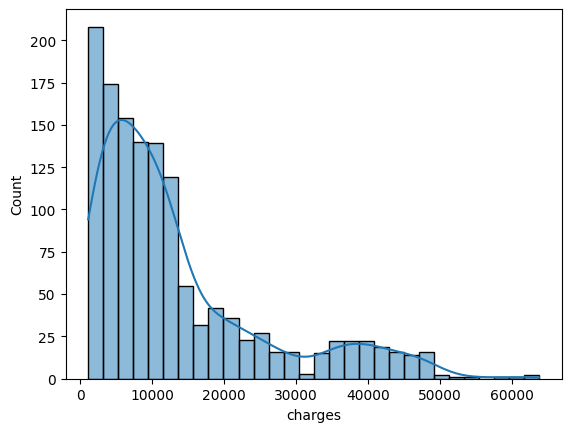

In [14]:
sns.histplot(dataset["charges"], kde=True)

## Now that we've plots ready lets investigate some questions.
Lets look at age, say I want to get for which age is the insurance charge maximum

In [15]:
x=dataset.groupby("age")["charges"].max()
x

age
18    38792.68560
19    39722.74620
20    38344.56600
21    26018.95052
22    44501.39820
23    40904.19950
24    38126.24650
25    42112.23560
26    36085.21900
27    39611.75770
28    51194.55914
29    44585.45587
30    40932.42950
31    58571.07448
32    37607.52770
33    55135.40209
34    43943.87610
35    39983.42595
36    43753.33705
37    46113.51100
38    41949.24410
39    40103.89000
40    40003.33225
41    40273.64550
42    43896.37630
43    45863.20500
44    48885.13561
45    62592.87309
46    46151.12450
47    44202.65360
48    45702.02235
49    39727.61400
50    42856.83800
51    47462.89400
52    60021.39897
53    46661.44240
54    63770.42801
55    44423.80300
56    43921.18370
57    48675.51770
58    47496.49445
59    48970.24760
60    52590.82939
61    48517.56315
62    46718.16325
63    48824.45000
64    49577.66240
Name: charges, dtype: float64

In [16]:
dataset.loc[dataset['charges'] == dataset['charges'].max(), 'age']

543    54
Name: age, dtype: int64

From the age plot we saw, majority age comes under 20, is there any relation between smoker and age for this gap. We use catplot here

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

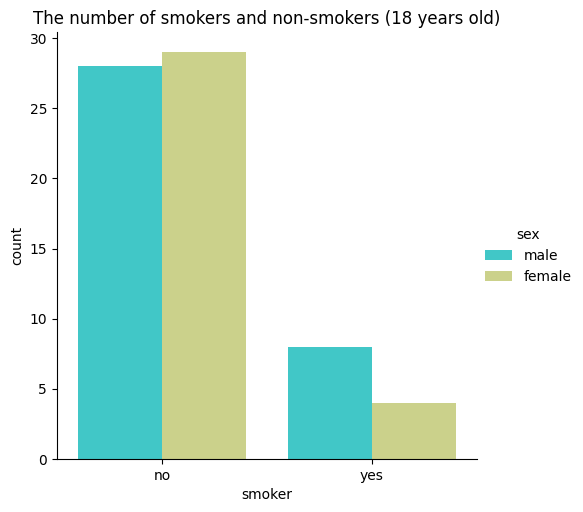

In [17]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=dataset[(dataset.age == 18)])
plt.title("The number of smokers and non-smokers (18 years old)")

Text(0.5, 1.0, 'Charges for smokers')

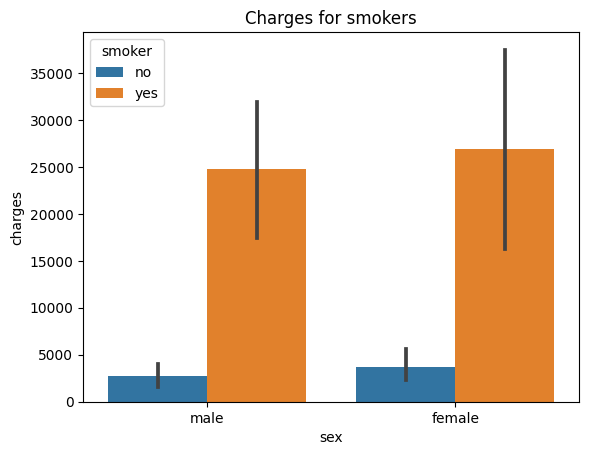

In [18]:
sns.barplot(x='sex', y='charges',hue='smoker', data=dataset[(dataset.age == 18)])
plt.title('Charges for smokers')

As we can see, even at the age of 18 smokers spend much more on treatment than non-smokers. Among non-smokers we are seeing some " tails." I can assume that this is due to serious diseases or accidents.

Text(0.5, 1.0, 'Charges for smokers')

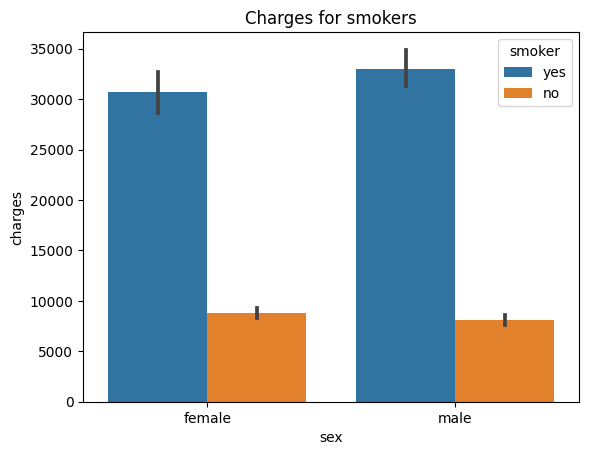

In [19]:
sns.barplot(x='sex', y='charges',hue='smoker', data=dataset)
plt.title('Charges for smokers')


which region has highest charge

In [20]:
y=dataset.groupby("region")["charges"].max().sort_values()
y

region
southwest    52590.82939
northeast    58571.07448
northwest    60021.39897
southeast    63770.42801
Name: charges, dtype: float64

Text(0.5, 1.0, 'Cost vs Region')

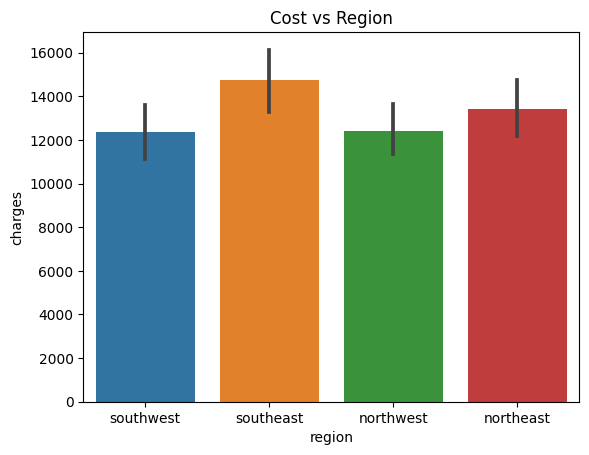

In [21]:
sns.barplot(x='region', y='charges', data=dataset)
plt.title('Cost vs Region')

Lets explore BMI now:
SINCE bmi>30 means obesity, lets explore charges

/var/folders/jq/mrhtzg1d1ql51pnd3xymhk3c0000gn/T/ipykernel_51658/4147848615.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[(dataset.bmi >= 30)]['charges'], color = 'y')


<AxesSubplot: title={'center': 'Distribution of charges for patients with BMI greater than 30'}, xlabel='charges', ylabel='Density'>

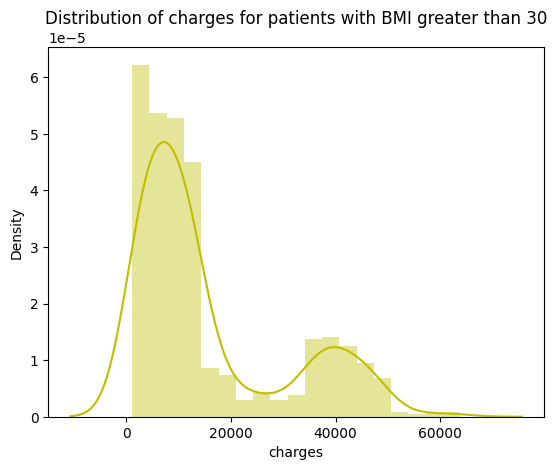

In [22]:
plt.title("Distribution of charges for patients with BMI greater than 30")
sns.distplot(dataset[(dataset.bmi >= 30)]['charges'], color = 'y')

/var/folders/jq/mrhtzg1d1ql51pnd3xymhk3c0000gn/T/ipykernel_51658/880589386.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[(dataset.bmi <= 30)]['charges'], color = 'y')


<AxesSubplot: title={'center': 'Distribution of charges for patients with BMI less than 30'}, xlabel='charges', ylabel='Density'>

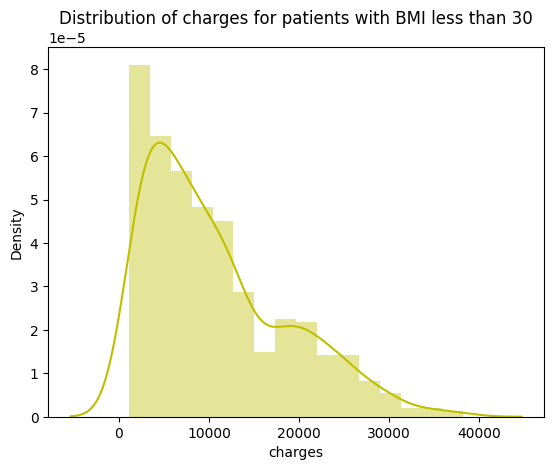

In [23]:
plt.title("Distribution of charges for patients with BMI less than 30")
sns.distplot(dataset[(dataset.bmi <= 30)]['charges'], color = 'y')

<AxesSubplot: xlabel='age', ylabel='charges'>

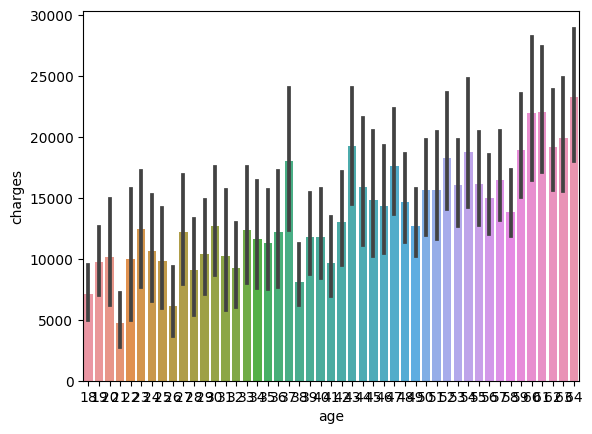

In [24]:
sns.barplot(x='age', y='charges',data=dataset)

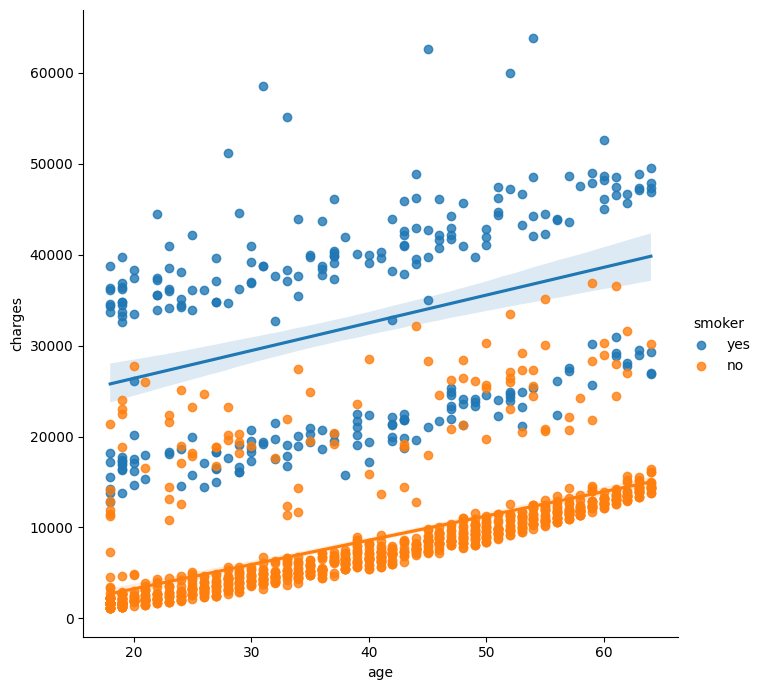

In [25]:
sns.lmplot(x="age", y="charges", hue="smoker", data=dataset, height = 7)

Cost of treatement incres with age for non smokers for smokers cost gets higher when compares to non smoker

In [26]:
# dataset.groupby('age').agg(['mean','min','max'])['charges']

In [27]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [28]:
dataset.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [29]:
catef= [features for features in dataset.columns if dataset[features].dtypes=='object']
catef

['sex', 'smoker', 'region']

In [30]:
from sklearn.preprocessing import OrdinalEncoder
ordinalencoder=OrdinalEncoder()

In [31]:
enc = OrdinalEncoder(dtype=int)
dataset[["sex","region", "smoker"]] = enc.fit_transform(dataset[["sex","region", "smoker"]])
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<AxesSubplot: >

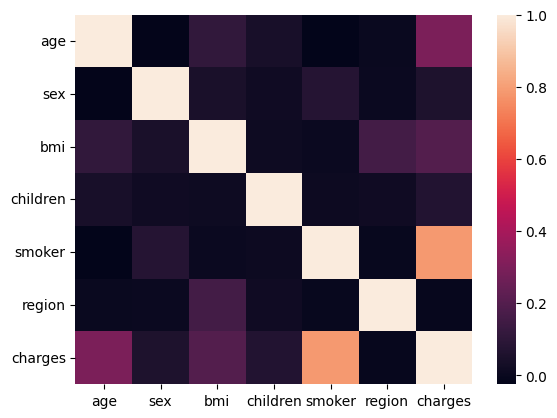

In [32]:
dataset.corr()
sns.heatmap(dataset.corr())

In [33]:
dataset.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

In [34]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(dataset)

VarianceThreshold(threshold=0)

In [35]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True])

In [36]:
newdataset = dataset.loc[:,["age","smoker", "bmi","charges"]]
newdataset.head()

,age,smoker,bmi,charges
0,19,1,27.900,16884.92400
1,18,0,33.770,1725.55230
2,28,0,33.000,4449.46200
3,33,0,22.705,21984.47061
4,32,0,28.880,3866.85520


In [37]:
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# # ### fit vs fit_transform
# # dataset_scaled=pd.DataFrame(scaler.fit_transform(newdataset), columns = newdataset.columns)
# dataset_scaled.head()

In [38]:
# dataset_scaled

In [39]:
# dataset['sex']=ordinalencoder.fit_transform(dataset['sex'])
# dataset['region']=ordinalencoder.fit_transform(dataset['region'])
# dataset['smoker']=ordinalencoder.fit_transform(dataset['smoker'])
# dataset.head()

In [40]:
X = newdataset.drop(['charges'], axis=1)
y = newdataset.charges

In [41]:
## train test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)


In [42]:
X_train

,age,smoker,bmi
332,61,0,31.160
355,46,0,27.600
138,54,0,31.900
381,55,1,30.685
292,25,1,45.540
...,...,...,...
1095,18,0,31.350
1130,39,0,23.870
1294,58,0,25.175
860,37,1,47.600


In [43]:
y_train

332     13429.03540
355     24603.04837
138     27322.73386
381     42303.69215
292     42112.23560
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 936, dtype: float64

In [44]:
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# # ### fit vs fit_transform
# # dataset_scaled=pd.DataFrame(scaler.fit_transform(newdataset), columns = newdataset.columns)
# # dataset_scaled.head()

In [45]:
# X_train=scaler.fit_transform(X_train)

In [46]:
# X_test=scaler.transform(X_test)

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [48]:
#mse diff b/w predicted and true value, high diff because scaled
from sklearn.model_selection import cross_val_score
import numpy as np
cross_val_score(linear_reg,X_train,y_train,cv=5)
# np.mean(mse)

array([0.76277518, 0.8007115 , 0.62560233, 0.69442519, 0.75562767])

In [49]:
y_pred_linear_reg_train = linear_reg.predict(X_train)
r2_score_linear_reg_train = r2_score(y_train, y_pred_linear_reg_train)

y_pred_linear_reg_test = linear_reg.predict(X_test)
r2_score_linear_reg_test = r2_score(y_test, y_pred_linear_reg_test)

In [50]:
print('R2_score (train) : {0:.3f}'.format(r2_score_linear_reg_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_linear_reg_test))

R2_score (train) : 0.739
R2_score (test) : 0.766


In [51]:
y_pred_linear_reg_test

array([ 8199.32161485,  7431.53224721, 37448.89919964,  8653.02727106,
       27231.44349732, 11184.1883801 ,   444.80195234, 17451.26461403,
        1086.28421375, 10424.64233492, 27638.58730835,  8942.21789096,
        5438.89080673, 37832.85609181, 41056.97246424, 36963.66100392,
       15074.73816658, 36195.84675295,  9419.17958643, 31899.75426509,
        2490.6280971 , 10138.80599921,  3065.67440642,  6984.51027604,
       10499.42667247, 13072.09193466, 15461.93875031,  5179.63438149,
        9201.46325694,  2715.00875791,  8249.19350717, 13580.63593631,
        5079.93483389,  2498.92395106,  4782.43453595, 13062.14520435,
        2264.61591365,  9241.3607708 , 33362.23271694, 32813.8382033 ,
        2467.37758748,  4174.17716262, 14637.62974792, 11993.48190088,
        8543.37546353, 12671.55162901,  4667.77480307,  2623.58294575,
       34919.49126514,  8892.38747088, 16653.53828692,  2459.07067426,
       12277.72542138,  1380.47446455, 14182.25939128, 11825.65128779,
      

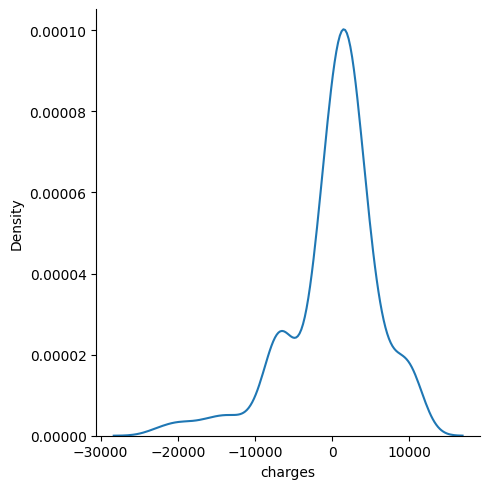

In [52]:
import seaborn as sns
sns.displot(y_pred_linear_reg_test-y_test,kind='kde')

In [53]:
from sklearn.ensemble import RandomForestRegressor
## train test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)


In [54]:
rf_reg = RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                       n_estimators=1200)
rf_reg.fit(X_train, y_train.ravel())


RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                      n_estimators=1200)

In [55]:
y_pred_rf_train_ = rf_reg.predict(X_train)
r2_score_rf_train_ = r2_score(y_train, y_pred_rf_train_)

y_pred_rf_test_ = rf_reg.predict(X_test)
r2_score_rf_test_ = r2_score(y_test, y_pred_rf_test_)

print('R2 score (train) : {0:.3f}'.format(r2_score_rf_train_))
print('R2 score (test) : {0:.3f}'.format(r2_score_rf_test_))

R2 score (train) : 0.877
R2 score (test) : 0.863


In [56]:
import pickle
pickle.dump(rf_reg, open('model.pkl', 'wb'))
pickled_model=pickle.load(open('model.pkl','rb'))
## Prediction
